## Does the presence of the HLA-DQB03:01 allele show differences in usage of any TRA@ family?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

### Look at all subjects' HLA alleles

In [2]:
HLA_path = "/labs/mignot/DGN_HLA_CALLS_OCT2019.txt"
HLA_df = pd.read_csv(HLA_path)
HLA_df['patid'] = HLA_df['PLATEID'].apply(lambda x: x.split("_")[-1])
HLA_df = HLA_df[HLA_df['patid'].str.startswith("LD")]
HLA_df['patid'] = HLA_df['patid'].apply(lambda x: int(x[2:]))
HLA_df = HLA_df.drop(["PLATEID"], axis=1)
HLA_df = HLA_df.set_index("patid")
HLA_df.head()

,HLA_A_A1,HLA_A_A2,HLA_A_PROB,HLA_B_A1,HLA_B_A2,HLA_B_PROB,HLA_C_A1,HLA_C_A2,HLA_C_PROB,HLA_DPB1_A1,...,HLA_DPB1_PROB,HLA_DQA1_A1,HLA_DQA1_A2,HLA_DQA1_PROB,HLA_DQB1_A1,HLA_DQB1_A2,HLA_DQB1_PROB,HLA_DRB1_A1,HLA_DRB1_A2,HLA_DRB1_PROB
patid,,,,,,,,,,,,,,,,,,,,,
14,01:01,31:01,0.998,35:01,44:02,0.935,04:01,05:01,1.000,04:01,...,0.934,01:01,03:01,0.918,03:02,05:01,0.988,01:01,04:01,0.961
41,25:01,26:01,0.907,18:01,38:01,0.938,12:03,12:03,0.989,04:01,...,0.809,01:02,03:01,0.969,03:02,06:02,0.988,04:02,15:01,0.830
38,02:06,25:01,0.676,08:01,27:05,0.865,03:03,07:01,0.464,01:01,...,0.984,01:02,05:01,0.988,02:01,06:02,0.977,03:01,15:01,1.000
84,01:01,03:01,0.992,07:02,52:01,0.995,07:02,12:02,1.000,04:01,...,0.990,01:02,01:03,0.999,06:01,06:02,0.994,15:01,15:02,0.999
22,01:01,68:01,0.996,08:01,44:02,0.999,07:01,07:04,0.999,04:01,...,0.809,01:01,03:01,0.976,03:02,05:01,0.986,01:01,04:04,0.837


### Analyze DQ clusters

In [36]:
HLA_DQ_df = HLA_df[['HLA_DQA1_A1', 'HLA_DQA1_A2', 'HLA_DQB1_A1', 'HLA_DQB1_A2']].copy()

In [37]:
HLA_DQ_df['DQB10301_present'] = (HLA_DQ_df['HLA_DQB1_A1'] == "03:01") | (HLA_DQ_df['HLA_DQB1_A2'] == "03:01")

In [38]:
HLA_DQ_df['DQB10602_present'] = (HLA_DQ_df['HLA_DQB1_A1'] == "06:02") | (HLA_DQ_df['HLA_DQB1_A2'] == "06:02")

In [39]:
HLA_DQ_df['DQB10301_0602_present'] = HLA_DQ_df['DQB10301_present'] & HLA_DQ_df['DQB10602_present']

In [40]:
HLA_DQ_df['DQA10302_present'] = (HLA_DQ_df['HLA_DQA1_A1'] == "03:02") | (HLA_DQ_df['HLA_DQA1_A2'] == "03:02")
HLA_DQ_df['DQA10303_present'] = (HLA_DQ_df['HLA_DQA1_A1'] == "03:03") | (HLA_DQ_df['HLA_DQA1_A2'] == "03:03")
HLA_DQ_df['DQA10401_present'] = (HLA_DQ_df['HLA_DQA1_A1'] == "04:01") | (HLA_DQ_df['HLA_DQA1_A2'] == "04:01")
HLA_DQ_df['DQA10505_present'] = (HLA_DQ_df['HLA_DQA1_A1'] == "05:05") | (HLA_DQ_df['HLA_DQA1_A2'] == "05:05")
HLA_DQ_df['DQA10601_present'] = (HLA_DQ_df['HLA_DQA1_A1'] == "06:01") | (HLA_DQ_df['HLA_DQA1_A2'] == "06:01")

In [6]:
HLA_DQ_0301_df = HLA_DQ_df[HLA_DQ_df["DQB10301_present"] == True]

In [7]:
idx = HLA_DQ_0301_df['DQA10302_present'] | HLA_DQ_0301_df['DQA10303_present'] | HLA_DQ_0301_df['DQA10401_present'] | HLA_DQ_0301_df['DQA10505_present'] | HLA_DQ_0301_df['DQA10601_present']

In [8]:
HLA_DQ_0301_df[idx == False] # does not fall into one of five haplotype groups, mistake in imputation perhaps?

,HLA_DQA1_A1,HLA_DQA1_A2,HLA_DQB1_A1,HLA_DQB1_A2,DQB10301_present,DQA10302_present,DQA10303_present,DQA10401_present,DQA10505_present,DQA10601_present
patid,,,,,,,,,,
248,02:01,05:09,02:02,03:01,True,False,False,False,False,False
403,02:01,05:03,03:01,03:03,True,False,False,False,False,False
1061,01:03,05:03,03:01,06:03,True,False,False,False,False,False


In [9]:
print(len(HLA_DQ_0301_df[HLA_DQ_0301_df['DQA10302_present'] == True]))
print(len(HLA_DQ_0301_df[HLA_DQ_0301_df['DQA10303_present'] == True]))
print(len(HLA_DQ_0301_df[HLA_DQ_0301_df['DQA10401_present'] == True]))
print(len(HLA_DQ_0301_df[HLA_DQ_0301_df['DQA10505_present'] == True]))
print(len(HLA_DQ_0301_df[HLA_DQ_0301_df['DQA10601_present'] == True]))
# only 0303 and 0505 have significant numbers of people

3
111
4
227
7


In [203]:
# all possible pairs for 0301 homozygous
# HLA_DQ_df[(HLA_DQ_df['HLA_DQB1_A1'] == "03:01") & (HLA_DQ_df['HLA_DQB1_A2'] == "03:01")][["HLA_DQA1_A1", "HLA_DQA1_A2"]].values

In [204]:
"""IF WE WANT TO TEST THE SAME THING EXCEPT IN PEOPLE WITH 0602 ONLY"""
# HLA_DQ_df = HLA_DQ_df[(HLA_DQ_df['HLA_DQB1_A1'] == "06:02") | (HLA_DQ_df['HLA_DQB1_A2'] == "06:02")]

In [ ]:
# # Analysis of people who also have 0602 (unused)

# # everyone who has one copy of 06:02
# HLA_DQB1_0602_df = HLA_DQB1_df[(HLA_DQB1_df['HLA_DQB1_A1'] == "06:02") | (HLA_DQB1_df['HLA_DQB1_A2'] == "06:02")]
# # remove homozygous 06:02
# HLA_DQB1_0602_df = HLA_DQB1_0602_df[~((HLA_DQB1_0602_df['HLA_DQB1_A1'] == "06:02") & (HLA_DQB1_0602_df['HLA_DQB1_A2'] == "06:02"))]

# HLA_DQB1_0602_df['0301_present'] = (HLA_DQB1_0602_df['HLA_DQB1_A1'] == "03:01") | (HLA_DQB1_0602_df['HLA_DQB1_A2'] == "03:01")

# HLA_DQB1_0602_df.head()

In [6]:
#HLA_DQ_df['HLA_DQB1_0301_dose'] = HLA_DQ_df['HLA_DQB1_A1'].apply(lambda x: 1 if x == "03:01" else 0)+HLA_DQ_df['HLA_DQB1_A2'].apply(lambda x: 1 if x == "03:01" else 0)

In [7]:
# # all unique DQA1s 
# DQA1_unique_alleles = np.unique(np.concatenate((HLA_DQ_df['HLA_DQA1_A1'].values, HLA_DQ_df['HLA_DQA1_A2'].values))).astype(str)
# # each patient will have a vector HLA_DQA1_vec that indicates via 0, 1, 2, which of the following alleles they have

In [8]:
# for allele in DQA1_unique_alleles:
#     HLA_DQ_df["DQA1_{}".format(allele)] = (HLA_DQ_df['HLA_DQA1_A1'] == allele).astype(int) + (HLA_DQ_df['HLA_DQA1_A2'] == allele).astype(int)

In [9]:
# np.unique(HLA_DQ_df.iloc[:,4:].values) # there are some people with two copies of the same allele

array([0, 1, 2])

In [12]:
# np.unique(HLA_DQ_df["HLA_DQB1_0301_dose"].values)

array([0, 1, 2])

### We want to associate HLA genotype to TRA@ Usage, so load all subjects' VDJ usage

In [41]:
VDJ_df = pd.read_csv("allVDJRatios.csv", index_col=0)

In [42]:
VDJ_df.head()

,patid,family,usage_ratio
0,1,TRAJ1,0.001676
1,1,TRAJ10,0.031014
2,1,TRAJ11,0.010897
3,1,TRAJ12,0.011735
4,1,TRAJ13,0.022632


In [43]:
VDJ_HLA_df = pd.merge(HLA_DQ_df, VDJ_df, on="patid", how="inner")

In [44]:
VDJ_HLA_df

,patid,HLA_DQA1_A1,HLA_DQA1_A2,HLA_DQB1_A1,HLA_DQB1_A2,DQB10301_present,DQB10602_present,DQB10301_0602_present,DQA10302_present,DQA10303_present,DQA10401_present,DQA10505_present,DQA10601_present,family,usage_ratio
0,14,01:01,03:01,03:02,05:01,False,False,False,False,False,False,False,False,TRAJ1,0.002662
1,14,01:01,03:01,03:02,05:01,False,False,False,False,False,False,False,False,TRAJ10,0.023957
2,14,01:01,03:01,03:02,05:01,False,False,False,False,False,False,False,False,TRAJ11,0.010648
3,14,01:01,03:01,03:02,05:01,False,False,False,False,False,False,False,False,TRAJ12,0.019521
4,14,01:01,03:01,03:02,05:01,False,False,False,False,False,False,False,False,TRAJ13,0.028394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93826,102,01:02,05:05,03:01,06:02,True,True,True,False,False,False,True,False,TRAV8-3,0.012676
93827,102,01:02,05:05,03:01,06:02,True,True,True,False,False,False,True,False,TRAV8-4,0.011972
93828,102,01:02,05:05,03:01,06:02,True,True,True,False,False,False,True,False,TRAV8-5,0.451408
93829,102,01:02,05:05,03:01,06:02,True,True,True,False,False,False,True,False,TRAV8-6,0.009155


#### Let's compute correlation between DQB10301_present	(True/False) and the usage_ratios of each family

In [45]:
TEST_GENOTYPE = '0301_0602' # '0301'

corr_df = VDJ_HLA_df[['patid', 'DQB1{}_present'.format(TEST_GENOTYPE), 'family', 'usage_ratio']]

In [46]:
import statsmodels.stats.multitest as sm
family_pvalue_dict = dict()
family_corrcoef_dict = dict()
for family in corr_df['family'].unique():
    try:
        family_df = corr_df[corr_df['family'] == family]
        dosage, usage_ratio = family_df['DQB1{}_present'.format(TEST_GENOTYPE)].values.astype("int"), family_df["usage_ratio"].values
        corrcoef, pvalue = scipy.stats.pearsonr(dosage, usage_ratio)
        family_corrcoef_dict[family] = (len(family_df), corrcoef, pvalue)
    except:
        print("skipped {} due to error".format(family))
        continue

ranked_families_corrcoef = sorted(family_corrcoef_dict, key=lambda x: -abs(family_corrcoef_dict[x][1]))

ns = []
families = []
corrcoefs = []
pvalues = []
for family in ranked_families_corrcoef:
    n, corrcoef, pvalue = family_corrcoef_dict[family]
    ns.append(n)
    families.append(family)
    corrcoefs.append(corrcoef)
    pvalues.append(pvalue)
# get 5% FDR corrected p-values
rejected, corrected_pvalues = sm.fdrcorrection(pvalues)

out_file = open("dqb1_{}_vdj_usage_correlation_results.csv".format(TEST_GENOTYPE), "w")
out_file.write("index,family,n,pearsons_R,pvalue,5%FDR_corrected_pvalue,rejected\n")

for i in range(len(families)):
    if rejected[i]:
        sig = "*"
    else:
        sig = ""
    out_file.write("{},{},{},{:.2e},{:.2e},{:.2e},{}\n".format(i+1,families[i],ns[i],corrcoefs[i],pvalues[i],corrected_pvalues[i],sig))
out_file.close()

In [47]:
path = "dqb1_{}_vdj_usage_correlation_results.csv".format(TEST_GENOTYPE)
df = pd.read_csv(path, index_col=0)
df = df[df["rejected"] == "*"]
df = df[['family','pearsons_R']]

In [48]:
df # fdr corrected significant associations with 0301 genotype

,family,pearsons_R
index,,
2,TRAV23/DV6,0.157
4,TRAJ17,0.130


In [19]:
len(VDJ_HLA_df['patid'].unique())

922

In [27]:
VDJ_HLA_df = VDJ_HLA_df.rename(columns={"family":"transcript"})
# even though we are summing over families, retain name "transcript" for compatability with below code

In [210]:
# VDJ_HLA_df['HLA_DQB1_0301_dose'].unique()

In [29]:
def get_transcript_df(transcript, remove_outliers=False):
    transcript_df = VDJ_HLA_df[VDJ_HLA_df['transcript'] == transcript]
    if remove_outliers:
        quantile_low, quantile_high = transcript_df["usage_ratio"].quantile([0.025, 0.975]).values
        transcript_df = transcript_df[(transcript_df["usage_ratio"] > quantile_low) & (transcript_df["usage_ratio"] < quantile_high)]
    return transcript_df

### Code for OLS Regression & Plot (treating 03:01 as dose - 0, 1, 2)

In [212]:
# def reg_plot_df(transcript_df, plot_column_name):
#     fig, ax = plt.subplots()
#     sns.violinplot(x="HLA_DQB1_0301_dose", y=plot_column_name, data=transcript_df, ax=ax)
#     sns.regplot(x="HLA_DQB1_0301_dose", y=plot_column_name, data=transcript_df, x_estimator=np.median, color="yellow", ax=ax, label="Median Estimator")
#     plt.title(transcript_df['transcript'].unique()[0])
#     plt.legend()

In [213]:
# covariate_column_names = ["DQA1_{}".format(allele) for allele in DQA1_unique_alleles]

In [214]:
# def regress_get_pvalue(transcript_df, plot_column_name, covariates=True, covariate_column_names=None):
#     if covariates:
#         X = transcript_df.loc[:, ["HLA_DQB1_0301_dose"]+covariate_column_names].values
#     else:
#         X = transcript_df.loc[:, ["HLA_DQB1_0301_dose"]].values
#     y = transcript_df[plot_column_name].values
#     XX = sm.add_constant(X)
#     mod = sm.OLS(y, XX)
#     res = mod.fit()
#     return res.params[1], res.pvalues[1] # p-value of coefficient, coefficient

### Code for T test & Distribution Plotting (treating 03:01 as binary - 0, 1)

In [39]:
def dist_plot_df(experiment_group_df, control_group_df, plot_column_name):
    present = experimental_group_df[plot_column_name].values
    absent = control_group_df[plot_column_name].values
    sns.distplot(present, bins=30, label="experiment group")
    sns.distplot(absent, bins=30, label="control group")
    plt.title(transcript_df['transcript'].unique()[0])
    plt.legend()
    plt.show()

In [40]:
def ttest_get_pvalue(experimental_group_df, control_group_df, plot_column_name):
    present = experimental_group_df[plot_column_name].values
    absent = control_group_df[plot_column_name].values
    #np.var(present), np.var(absent) # check variance
    t, p = scipy.stats.ttest_ind(present, absent)
    return np.mean(present), np.mean(absent), t, p

In [77]:
transcript_pvalue_dict = dict()
for transcript in VDJ_HLA_df['transcript'].unique():
    try:
        transcript_df = get_transcript_df(transcript, remove_outliers=False)
        experimental_group_df = transcript_df[(transcript_df['DQB10301_present'] == True) & (transcript_df['DQA10303_present'] == True)]
        if len(experimental_group_df) == 0:
            print("skipped {} due to no subjects in experiment group".format(transcript))
        control_group_df = transcript_df[transcript_df['DQB10301_present'] == False]
        print(transcript, len(experimental_group_df), len(control_group_df))
        # visual inspection suggests similar variance across two groups
        ## TWO GROUP T TEST
        #dist_plot_df(transcript_df, "usage_ratio") # plot overlapping histograms
        present_mean, absent_mean, t, p = ttest_get_pvalue(experimental_group_df, control_group_df, "usage_ratio")
        transcript_pvalue_dict[transcript] = (len(experimental_group_df), len(control_group_df), present_mean, absent_mean, t, p)
        
        ## REGRESSION
        #slope, slope_p = regress_get_pvalue(transcript_df, "usage_ratio", covariates=True, covariate_column_names=covariate_column_names)
        #transcript_pvalue_dict[transcript] = (len(transcript_df), slope, slope_p)
    except:
        print("skipped {} due to error".format(transcript))
        continue

TRAJ1 92 490
TRAJ10 108 606
TRAJ11 108 604
TRAJ12 108 602
TRAJ13 108 603
TRAJ14 39 230
TRAJ15 108 605
TRAJ16 107 606
TRAJ17 108 605
TRAJ18 108 606
TRAJ2 90 492
TRAJ20 108 607
TRAJ21 108 604
TRAJ22 108 605
TRAJ23 108 605
TRAJ24 108 605
TRAJ26 108 604
TRAJ27 108 606
TRAJ28 108 607
TRAJ29 108 605
TRAJ3 108 605
TRAJ30 108 606
TRAJ31 108 605
TRAJ32 108 605
TRAJ33 108 607
TRAJ34 108 607
TRAJ35 108 597
TRAJ36 108 604
TRAJ37 108 606
TRAJ38 106 602
TRAJ39 108 603
TRAJ4 108 607
TRAJ40 108 604
TRAJ41 107 600
TRAJ42 108 607
TRAJ43 108 602
TRAJ44 108 605
TRAJ45 108 607
TRAJ46 90 501
TRAJ47 108 598
TRAJ48 108 603
TRAJ49 108 607
TRAJ5 108 606
TRAJ50 108 593
TRAJ52 108 606
TRAJ53 108 606
TRAJ54 108 607
TRAJ56 103 596
TRAJ57 108 603
TRAJ58 108 599
TRAJ6 108 605
TRAJ7 107 598
TRAJ8 108 604
TRAJ9 108 607
TRAV1-1 108 606
TRAV1-2 108 607
TRAV10 108 606
TRAV12-1 108 607
TRAV12-2 108 607
TRAV12-3 108 607
TRAV13-1 108 607
TRAV13-2 108 607
TRAV14/DV4 108 607
TRAV16 108 607
TRAV17 108 607
TRAV18 107 603
TRAV19 

In [78]:
len(transcript_pvalue_dict) # how many tests did we do

115

In [79]:
ranked_transcripts = sorted(transcript_pvalue_dict, key=lambda x: transcript_pvalue_dict[x][-1])

In [80]:
# # REGRESSION

# out_file = open("vdj_usage_dqb10301_by_family_dqa1controlled_ols_results.csv", "w")
# out_file.write("index,transcript,n,OLS slope coefficient,coefficient p-value\n")
# for i, transcript in enumerate(ranked_transcripts):
#     n, slope, p = transcript_pvalue_dict[transcript]
#     out_file.write("{},{},{},{:.8f},{:.8f}\n".format(i+1, transcript, n, slope, p))
# out_file.close()

In [81]:
# T Test 

out_file = open("vdj_usage_dqb10301_dqa10303_ttest_results.csv", "w")
out_file.write("index,transcript,present_n,absent_n,0303+0301_present_mean, 0301_absent_mean, mean_diff(pres-abs), t-stat, p-value\n")
for i, transcript in enumerate(ranked_transcripts):
    n1, n2, present_mean, absent_mean, t, p = transcript_pvalue_dict[transcript]
    out_file.write("{},{},{},{},{:.4f},{:.4f},{:.4f},{:.8f},{:.8f}\n".format(i+1, transcript, n1, n2, present_mean, absent_mean, present_mean-absent_mean, t, p))
out_file.close()

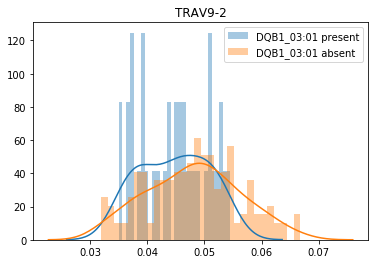

In [174]:
transcript_df = get_transcript_df("TRAV9-2", remove_outliers=True)
dist_plot_df(transcript_df, "usage_ratio")

In [ ]:
plot_df(get_transcript_df("TRAV20", remove_outliers=True), "usage_ratio")

In [ ]:
plot_df(get_transcript_df("TRAV20", remove_outliers=False), "usage_ratio")